# Data preparation

1. Understanding the data
2. Pre-processing the data

---

## 1. Understanding the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow

In [2]:
# Define functions to help with understanding the images

def print_RGBimage(RGBimage, img_nchannels, img_height = 'H', img_width = 'W'):
    
    fig, ax = plt.subplots(1, 4, figsize = (16, 4))
    
    # Plotting main image 
    if img_nchannels == 1:
        ax[0].imshow(RGBimage, cmap = plt.cm.gray)
    elif img_nchannels == 3:
        ax[0].imshow(RGBimage)
        
    ax[0].set_title("Original Image")
    ax[0].set_xlabel("W: " + str(img_width))
    ax[0].set_ylabel("H: " + str(img_height))
    ax[0].set_frame_on(False)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    # Plotting RGB channels
    if img_nchannels == 3:
        for i, cmap in enumerate(["Reds", "Greens", "Blues"]):
            ax[i+1].imshow(RGBimage[:, :, i], cmap = cmap)
            ax[i+1].set_title(cmap[0])
            ax[i+1].set_frame_on(False)
            ax[i+1].set_xticks([])
            ax[i+1].set_yticks([])

            
def print_Labimage(Labimage, img_height = 'H', img_width = 'W'):
    
    labimg_rescaled = (Labimage + [0, 128, 128]) / [100, 255, 255]
    
    fig, ax = plt.subplots(1, 4, figsize = (16, 4))
    
    ax[0].imshow(labimg_rescaled)
    ax[0].set_title("Lab Image")
    ax[0].set_xlabel("W: " + str(img_width))
    ax[0].set_ylabel("H: " + str(img_height))
    ax[0].set_frame_on(False)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    for i, col in enumerate(['L', 'a', 'b']):
        
        if col == 'L':
            ax[i+1].imshow(labimg_rescaled[:, :, i], cmap = plt.cm.gray)
        elif col == 'a':
            ax[i+1].imshow(labimg_rescaled[:, :, i], cmap = 'RdYlGn_r')
        elif col == 'b':
            ax[i+1].imshow(labimg_rescaled[:, :, i], cmap = 'YlGnBu_r')
            
        ax[i+1].set_title(col)
        ax[i+1].set_frame_on(False)
        ax[i+1].set_xticks([])
        ax[i+1].set_yticks([])

        
def RGBimage_summary(RGBimage):

    '''Prints a summary of key information of a RGB image and
    prints the image together with is RGB breakdown.'''
    
    print("=================")
    print("RGB Image Summary")
    print("=================")
    
    RGBimg = RGBimage
    
    img_type = type(RGBimg)
    print(f"Object type: {img_type}")
    
    img_dim = RGBimg.shape
    img_height, img_width = img_dim[0], img_dim[1]
    print(f"Image dimensions: {img_dim}")

    img_nchannels = 1 if len(img_dim) == 2 else img_dim[-1]
    print(f"Number of channels: {img_nchannels}")
    
    if img_nchannels == 3:
        R_max, R_min = np.max(RGBimg[:, :, 0]), np.min(RGBimg[:, :, 0])
        G_max, G_min = np.max(RGBimg[:, :, 1]), np.min(RGBimg[:, :, 1])
        B_max, B_min = np.max(RGBimg[:, :, 2]), np.min(RGBimg[:, :, 2])
        
        print (f"R range: [{R_min}, {R_max}]")
        print (f"G range: [{G_min}, {G_max}]")
        print (f"B range: [{B_min}, {B_max}]")
        
    elif img_nchannels == 1:
        Gray_max, Gray_min = np.max(RGBimg), np.min(RGBimg)
        print(f"Gray range: [{Gray_min}, {Gray_max}]")

    
    # ===== Print image =====
    print_RGBimage(RGBimage = RGBimg, img_nchannels = img_nchannels, img_width = img_width, img_height = img_height)
    

    
def Labimage_summary(Labimage):

    '''Prints a summary of key information of a Lab image and
    prints the image together with is RGB breakdown.'''
    
    print("=================")
    print("Lab Image Summary")
    print("=================")
    
    Labimg = Labimage
    
    img_type = type(Labimg)
    print(f"Object type: {img_type}")
    
    img_dim = Labimg.shape
    img_height, img_width, img_nchannels = img_dim[0], img_dim[1], img_dim[2]
    print(f"Image dimensions: {img_dim}")
    print(f"Number of channels: {img_nchannels}")
    
    L_max, L_min = np.max(Labimg[:, :, 0]), np.min(Labimg[:, :, 0])
    a_max, a_min = np.max(Labimg[:, :, 1]), np.min(Labimg[:, :, 1])
    b_max, b_min = np.max(Labimg[:, :, 2]), np.min(Labimg[:, :, 2])

    print (f"L range: [{L_min}, {L_max}]")
    print (f"a range: [{a_min}, {a_max}]")
    print (f"b range: [{b_min}, {b_max}]")
    
    
    # ===== Print image =====
    print_Labimage(Labimage = Labimg, img_width = img_width, img_height = img_height)

In [3]:
silver = imread(fname = "Images/PokemonSilver/PokemonSilver_227.jpg")
blue = imread(fname = "Images/PokemonBlue/PokemonBlue_264.jpg", as_gray = True)

RGB Image Summary
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320)
Number of channels: 1
Gray range: [0.0, 1.0]


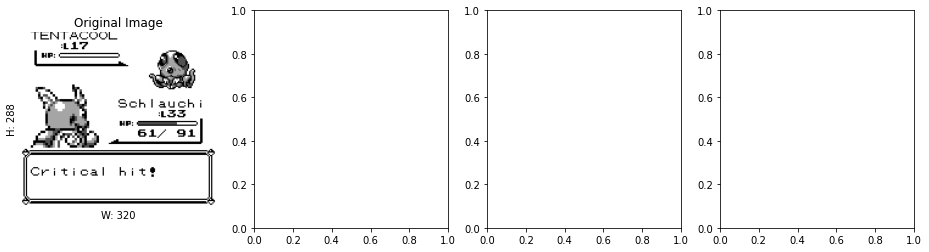

In [4]:
RGBimage_summary(blue)

RGB Image Summary
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320, 3)
Number of channels: 3
R range: [0, 255]
G range: [0, 255]
B range: [0, 255]


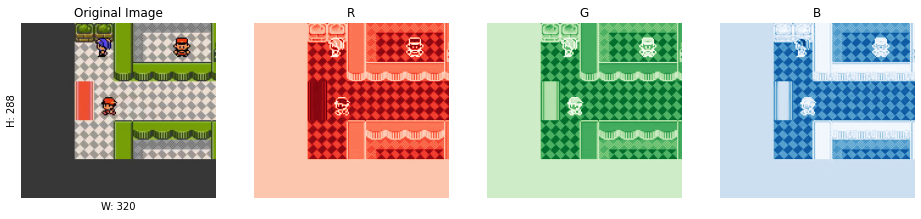

In [5]:
RGBimage_summary(silver)

Lab Image Summary
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320, 3)
Number of channels: 3
L range: [0.0, 99.03891719251041]
a range: [-38.093426938992145, 76.1617795477616]
b range: [-94.04475228524977, 73.82320749711002]


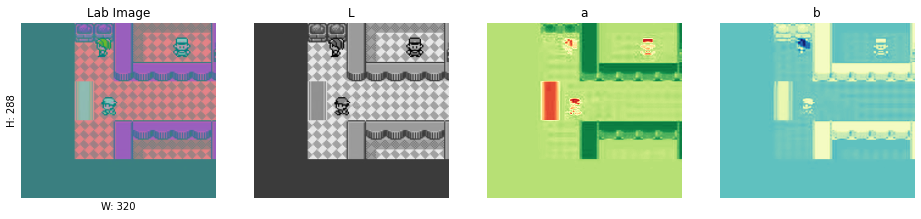

In [6]:
silver_lab = rgb2lab((1.0 / 255) * silver)

Labimage_summary(silver_lab)

## Dataloaders and pre-processing

In [14]:
from pathlib import Path
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [16]:
# Get images from given directory

Xtrain = []
Xtrain_dir = Path("Images/PokemonSilver")

# Load image as numpy arrays to the list X
for filename in os.listdir(Xtrain_dir):
    img_dir = Xtrain_dir / filename
    Xtrain.append(img_to_array(load_img(img_dir)))

# Convert the list of arrays into a 4D numpy array
Xtrain = np.array(Xtrain, dtype = float)

# # Normalise the RGB image to the range [0.0, 1.0], save as Xtrain
# Xtrain = (1.0 / 255) * Xtrain

In [17]:
# Create image generator for image augmentation during training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.4,
                                   zoom_range = 0.4,
                                   rotation_range = 45,
                                   horizontal_flip = True,
                                   validation_split = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1./255)



def TrainImage_a_b_gen(batch_size):
    '''Function that gets the training images using the flow method
    via train_generator and applies the data augmentation of train_datagen.
    This function is then used in the .fit() method when training the model.
    
    Note that this returns a tuple of (inputs, targets),
    where inputs is a np.array with shape (batch_size, h, w, 1)
    and targets is a np.array with shape (batch_sze, h, w, 2).'''
    
    train_generator = train_datagen.flow(x = Xtrain,
                                         batch_size = batch_size,
                                         subset = "training",
                                         save_to_dir = "Images/PokemonSilver/AugmentedTrain", 
                                         save_prefix = "PokemonSilver_Augmented",
                                         save_format = "png",
                                         shuffle = True,
                                         seed = 42)
    
    for batch in train_generator:
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:, :, :, 0]
        Y_batch = lab_batch[:, :, :, 1:]
        Y_batch /= 128 # Normalise the values to [-1.0, 1.0]
        yield (X_batch.reshape(X_batch.shape + (1, )), Y_batch)
        

def ValidationImage_a_b_gen(batch_size):
    
    validation_generator = validation_datagen.flow(x = Xtrain,
                                              batch_size = batch_size,
                                              subset = "validation",
                                              save_to_dir = "Images/PokemonSilver/AugmentedValidation", 
                                              save_prefix = "PokemonSilver_Augmented",
                                              save_format = "png",
                                              shuffle = True,
                                              seed = 42)
    
    for batch in validation_generator:
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:, :, :, 0]
        Y_batch = lab_batch[:, :, :, 1:]
        Y_batch /= 128
        yield (X_batch.reshape(X_batch.shape + (1, )), Y_batch)

    

## Model